## K-means clustering ##
Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Finding closest centroids**

$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2, $$ 


In [3]:
def find_closest_centroids(X, centroids):
    """
        idx (array_like): (m,) closest centroids
         K: total number of centroids
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

**Computing centroid means**

for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

$C_k$ is the set of examples that are assigned to centroid $k$

$|C_k|$ is the number of examples in the set $C_k$

In [4]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        points = X[idx==i] #points assigned to centroid k = i
        centroids[i] = np.mean(points, axis = 0)
        
    return centroids

In [5]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    centroids_history = []
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        centroids_history.append(centroids)
        
    return centroids, idx, centroids_history

**Applying algorithm to an example**

In [6]:
X_df = pd.read_csv('data.csv')
X = X_df.to_numpy()[:, :2]
print(f'Shape of X: \n {X.shape}')
print(f'First five elements of X are: \n {X[:5]}')
print(f'Min and max values of X are: \n {min(X[0])}, {min(X[1])}, \n {max(X[0])}, {max(X[1])}') 

Shape of X: 
 (336, 2)
First five elements of X are: 
 [[516.01270584 393.01451385]
 [436.21176221 408.65658486]
 [512.05260123 372.02201357]
 [489.14046445 401.80715936]
 [446.20798589 338.51668221]]
Min and max values of X are: 
 393.01451385201693, 408.6565848615271, 
 516.0127058374305, 436.2117622061974


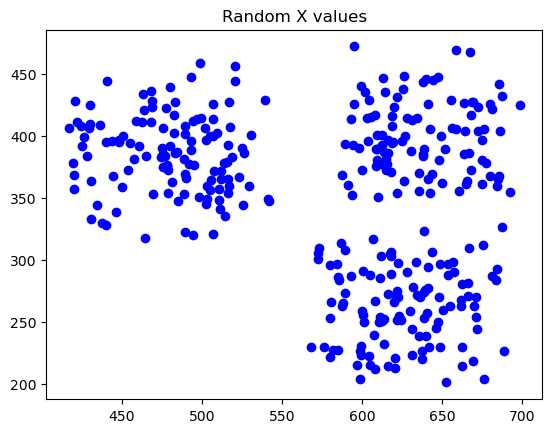

In [7]:
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c='b', marker='o')

plt.title('Random X values')
plt.show()

In [8]:
# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Generate a random matrix with K rows and 2 columns, values range from 0 to 500
K = 3

first_column = 450 + (np.random.rand(K) * 200)
second_column = 200 + (np.random.rand(K) * 250)
initial_centroids = np.column_stack((first_column, second_column))

print("Randomly initialized centroids are:\n", initial_centroids)

Randomly initialized centroids are:
 [[524.90802377 349.66462105]
 [640.14286128 239.00466011]
 [596.39878836 238.99863008]]


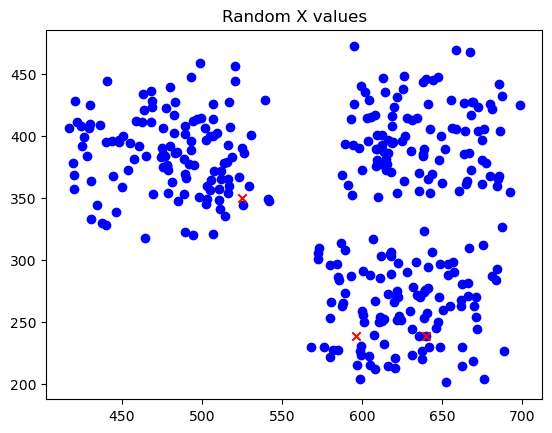

In [9]:
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c='b', marker='o')

for i in range(initial_centroids.shape[0]):
    plt.scatter(initial_centroids[i, 0], initial_centroids[i, 1], c='r', marker='x')

plt.title('Random X values')
plt.show()

In [139]:
# Select an initial set of centroids (3 Centroids)
idx = find_closest_centroids(X, initial_centroids)

centroids = compute_centroids(X, idx, K)
print("The centroids are:", centroids)

The centroids are: [[545.16176395 392.46319835]
 [652.63479806 282.09411038]
 [598.58582859 259.82485991]]


In [10]:
max_iters = 10
centroids, idx, centroids_history = run_kMeans(X, initial_centroids, max_iters)
print(centroids)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
[[480.60429976 385.44506433]
 [637.75071074 398.6318426 ]
 [625.47828017 262.80438639]]


<Figure size 800x600 with 0 Axes>

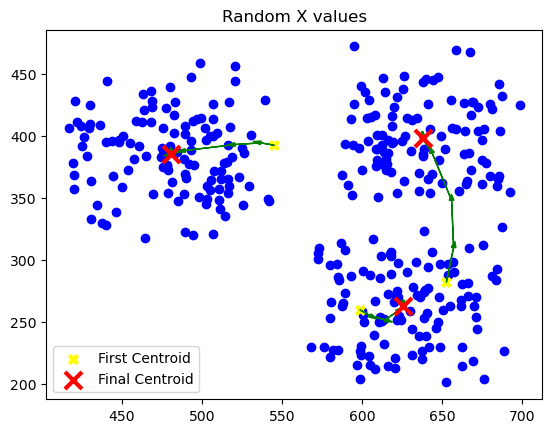

In [11]:
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c='b', marker='o')

for i in range(centroids.shape[0]):
    plt.scatter(centroids_history[0][i, 0], centroids_history[0][i, 1], c='yellow', marker='x', linewidth = 3, label='First Centroid' if i == 0 else '')

    for n in range(1, max_iters):
        plt.arrow(centroids_history[n-1][i, 0], centroids_history[n-1][i, 1], #x, y coord
                  centroids_history[n][i, 0] - centroids_history[n-1][i, 0], #length OX
                  centroids_history[n][i, 1] - centroids_history[n-1][i, 1], #length OY
                  color='g', head_width=3, head_length=5)
        
    plt.scatter(centroids_history[-1][i, 0], centroids_history[-1][i, 1], c='r', marker='x', s = 150, linewidth = 3, label='Final Centroid' if i == 0 else '')



plt.title('Random X values')
plt.legend()
plt.show()

In [142]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    """
    
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

## Image compression using K-Means algorithm ##

This project demonstrates how to use the K-means clustering algorithm to compress images. By reducing the number of colors in an image, this technique can significantly decrease file size while maintaining visual quality.

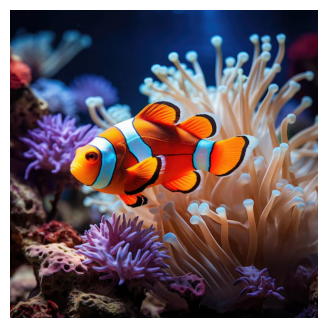

Shape of original image: 
 (626, 626, 3)


In [146]:
original_img = plt.imread('fish.png')

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.axis('off')
ax.imshow(original_img)
plt.show()

print('Shape of original image: \n', original_img.shape)

In [147]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Reshape the image into an m x 3 matrix where m = number of pixels
(in this case m = 626 x 626 = 391867)
Each row will contain the Red, Green and Blue pixel values

In [148]:
# Run your K-Means algorithm on this data
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx, centroids_history = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [149]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (391876,)
Closest centroid for the first five elements: [0 0 0 0 0]


In [150]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

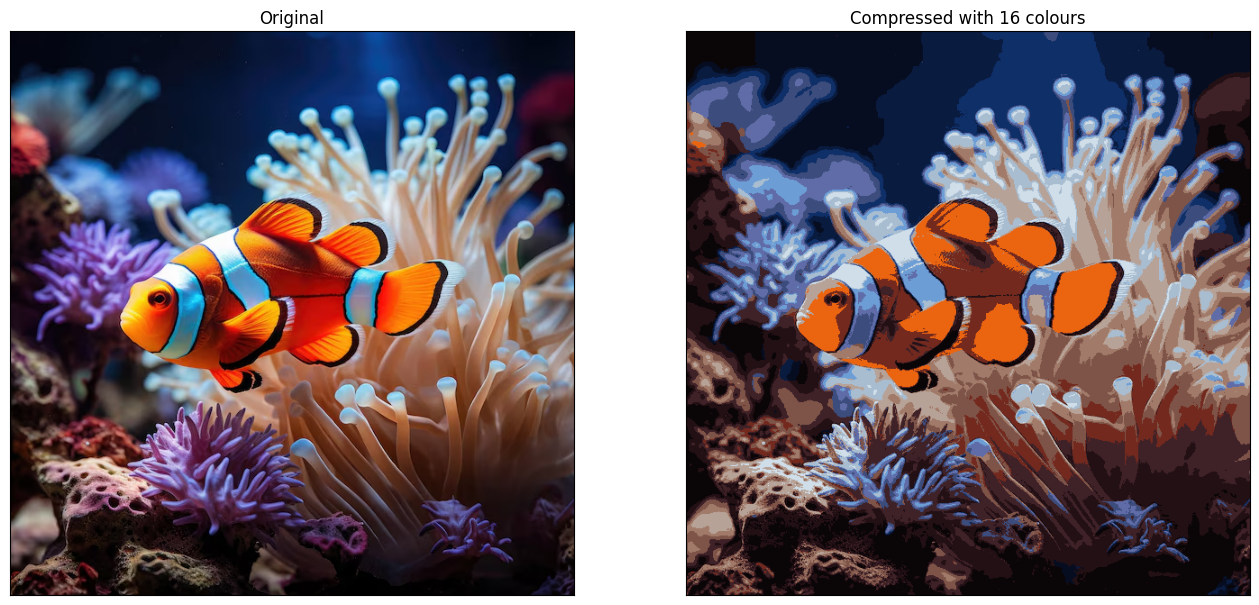

In [151]:
import matplotlib.pyplot as plt

figs, ax = plt.subplots(1, 2, figsize=(16, 16))

# Display original image
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours' % K)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

**Conclusion**

Overall, this project provided an understanding of how clustering algorithms like K-means can be applied to real-world problems (such as image compression). Moving forward, this technique can be extended and optimized for more complex image processing tasks.